 Data Source: https://www.kaggle.com/anthonypino/melbourne-housing-market?select=Melbourne_housing_FULL.csv

 This notebook is part of CSC 8004 Data Mining course USQ submitted by Nithin Jose

#Loader

The dataset is loaded from google drive. For this method to work for you, you must have the dataset uploaded to google drive and the correct path must be set in path variable. You are free to use any method for data loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import pandas as pd
path="/content/drive/My Drive/Study/s1 2021/CSC 8004 Data Mining/Project/Dataset/Melbourne_housing_FULL.csv"
raw_df=pd.read_csv(path)

In [ ]:
raw_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
raw_df.shape

(34857, 21)

#Preprocessing

## Cleaning

### MIssing values

Percentage of Missing values

In [ ]:
temp=(raw_df.isnull().sum()*100/len(raw_df))

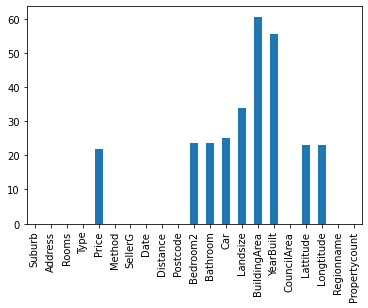

In [ ]:
temp.plot.bar()

Good strategy is to remove all 21% missing prices just to make sure that we are creating the most accurate model.

Create copy of dataset

In [ ]:
working_df=raw_df

Remove null price

In [ ]:
working_df=working_df[working_df['Price'].isnull()==False]

Again checking for null values percentage

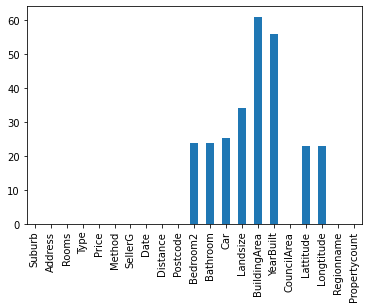

In [ ]:
(working_df.isnull().sum()*100/len(working_df)).plot.bar()

In [ ]:
working_df.reset_index(inplace=True)

In [ ]:
working_df.shape

(27247, 22)

As first approach we will be removing Building area and year built and delete all rows with empty data

#### Approach 1

In [ ]:
app_1_working_df=working_df

In [ ]:
app_1_working_df.head()

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0


Remove Building area and year

In [ ]:
app_1_working_df.drop(['BuildingArea','YearBuilt'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
app_1_working_df.head(1)

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0


In [ ]:
app_1_working_df.shape

(27247, 20)

Calculating rows in which more than 3 attributes are missing

In [ ]:
app_1_working_df[(app_1_working_df.isnull().sum(axis=1))>3]

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
8,15,Abbotsford,217 Langridge St,3,h,1000000.0,S,Jellis,8/10/2016,2.5,3067.0,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
9,16,Abbotsford,18a Mollison St,2,t,745000.0,S,Jellis,8/10/2016,2.5,3067.0,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
12,19,Abbotsford,403/609 Victoria St,2,u,542000.0,S,Dingle,8/10/2016,2.5,3067.0,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
13,21,Abbotsford,25/84 Trenerry Cr,2,u,760000.0,SP,Biggin,10/12/2016,2.5,3067.0,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
14,22,Abbotsford,106/119 Turner St,1,u,481000.0,SP,Purplebricks,10/12/2016,2.5,3067.0,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27230,34838,Williamstown,11/81 Melbourne Rd,2,u,450000.0,SP,Raine,24/02/2018,6.8,3016.0,NaN,NaN,NaN,NaN,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
27231,34839,Williamstown,24/18 Station Rd,2,u,475000.0,SP,Greg,24/02/2018,6.8,3016.0,NaN,NaN,NaN,NaN,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
27232,34840,Williamstown,3/2 Thompson St,2,u,520000.0,VB,Raine,24/02/2018,6.8,3016.0,NaN,NaN,NaN,NaN,Hobsons Bay City Council,NaN,NaN,Western Metropolitan,6380.0
27236,34844,Windsor,4/16 Lewisham Rd,1,u,440000.0,SP,Biggin,24/02/2018,4.6,3181.0,NaN,NaN,NaN,NaN,Port Phillip City Council,NaN,NaN,Southern Metropolitan,4380.0


It seems that empty values are occuring in a group of columns and repeating. This means that this data could have been scrapped or loaded from a separate data source.

Also around 6435 rows are to be deleted and in this approach 1 we will delete all these rows

In [ ]:
app_1_working_df.drop(app_1_working_df[(app_1_working_df.isnull().sum(axis=1))>3].index,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
app_1_working_df.shape

(20812, 20)

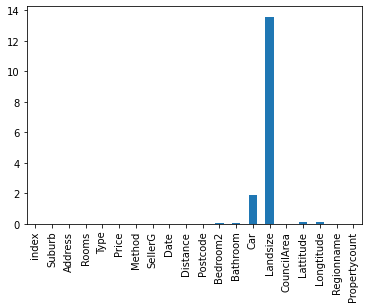

In [ ]:
(app_1_working_df.isnull().sum()*100/len(working_df)).plot.bar()

Still land size and bathroom have some empty rows but we think we should remove all NA row

In [ ]:
app_1_working_df.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
app_1_working_df.shape

(17679, 20)

##### Get suburb details function (Not using this now)

In [ ]:
def get_suburb_details():
  return

In [ ]:
app_1_working_df[app_1_working_df['Bedroom2'].isnull()]['Suburb']

Series([], Name: Suburb, dtype: object)

#### Approach 2

#### Merging values 

In [ ]:
working_df=app_1_working_df

In [ ]:
working_df.shape

(17679, 20)

## Handling Outliers

### Handling Numerical Outlier

We will be using Z score to handle outliers. See Z score concept below: https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame

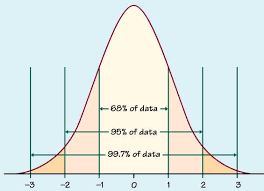

In [ ]:
working_df.head()

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0


Taking copy of original dataframe

In [ ]:
outlier_working_df=working_df

Filtering numerical variables

In [ ]:
from scipy import stats
import numpy as np

outlier_working_df[['Rooms','Price','Distance','Bedroom2','Bathroom','Car','Landsize','Propertycount']]

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,Propertycount
0,2,1480000.0,2.5,2.0,1.0,1.0,202.0,4019.0
1,2,1035000.0,2.5,2.0,1.0,0.0,156.0,4019.0
2,3,1465000.0,2.5,3.0,2.0,0.0,134.0,4019.0
3,3,850000.0,2.5,3.0,2.0,1.0,94.0,4019.0
4,4,1600000.0,2.5,3.0,1.0,2.0,120.0,4019.0
...,...,...,...,...,...,...,...,...
27240,3,570000.0,25.5,3.0,2.0,2.0,404.0,2940.0
27242,4,1480000.0,6.3,4.0,1.0,3.0,593.0,6543.0
27243,2,888000.0,6.3,2.0,2.0,1.0,98.0,6543.0
27244,2,705000.0,6.3,2.0,1.0,2.0,220.0,6543.0


In [ ]:
outlier_working_df=outlier_working_df[(np.abs(stats.zscore(outlier_working_df[['Rooms','Price','Distance','Bedroom2','Bathroom','Car','Landsize','Propertycount']])) < 3).all(axis=1)]

In [ ]:
outlier_working_df.shape

(16091, 20)

Around 1500 rows of data deleted

### Handling categorical outliers

We will go in detail through each of the categorical features

Since region name is the most generalised version of the suburb, we will first delete region which are very less in number

In [ ]:
(outlier_working_df['Regionname'].value_counts())

Southern Metropolitan         5127
Northern Metropolitan         4529
Western Metropolitan          3712
Eastern Metropolitan          2025
South-Eastern Metropolitan     583
Western Victoria                40
Northern Victoria               39
Eastern Victoria                36
Name: Regionname, dtype: int64

In [ ]:
(outlier_working_df['Regionname'].value_counts())

Southern Metropolitan         5127
Northern Metropolitan         4529
Western Metropolitan          3712
Eastern Metropolitan          2025
South-Eastern Metropolitan     583
Western Victoria                40
Northern Victoria               39
Eastern Victoria                36
Name: Regionname, dtype: int64

In [ ]:
outlier_working_df=outlier_working_df[(outlier_working_df.groupby('Regionname').Regionname.transform('count')>50)].copy()

In [ ]:
outlier_working_df.shape

(15976, 20)

In [ ]:
(outlier_working_df['CouncilArea'].value_counts())

Boroondara City Council           1480
Moreland City Council             1158
Darebin City Council              1092
Moonee Valley City Council        1067
Glen Eira City Council            1020
Melbourne City Council             919
Banyule City Council               873
Maribyrnong City Council           841
Brimbank City Council              828
Bayside City Council               752
Monash City Council                595
Port Phillip City Council          587
Hume City Council                  577
Yarra City Council                 576
Hobsons Bay City Council           543
Manningham City Council            528
Stonnington City Council           512
Whittlesea City Council            460
Kingston City Council              399
Wyndham City Council               290
Whitehorse City Council            287
Maroondah City Council             205
Knox City Council                  191
Greater Dandenong City Council     111
Melton City Council                 60
Casey City Council       

Deleting council areas with count less than 100

In [ ]:
outlier_working_df=outlier_working_df[(outlier_working_df.groupby('CouncilArea').Regionname.transform('count')>50)].copy()

In [ ]:
outlier_working_df.head(1)

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0


In [ ]:
temp_count=outlier_working_df['Suburb'].value_counts()

In [ ]:
list(temp_count)

[289,
 282,
 277,
 253,
 244,
 236,
 224,
 204,
 203,
 201,
 200,
 192,
 191,
 184,
 183,
 178,
 174,
 171,
 169,
 169,
 163,
 162,
 158,
 155,
 152,
 152,
 151,
 150,
 143,
 142,
 140,
 134,
 134,
 131,
 130,
 130,
 128,
 128,
 127,
 126,
 123,
 120,
 109,
 109,
 106,
 106,
 106,
 104,
 104,
 103,
 101,
 100,
 100,
 98,
 95,
 94,
 91,
 91,
 90,
 89,
 89,
 89,
 88,
 86,
 86,
 84,
 82,
 82,
 81,
 81,
 81,
 80,
 78,
 77,
 74,
 71,
 71,
 71,
 70,
 70,
 70,
 69,
 69,
 68,
 67,
 67,
 66,
 66,
 66,
 66,
 65,
 63,
 62,
 62,
 62,
 62,
 61,
 60,
 59,
 59,
 56,
 55,
 53,
 53,
 53,
 52,
 52,
 51,
 51,
 51,
 50,
 50,
 49,
 48,
 48,
 48,
 47,
 47,
 46,
 46,
 46,
 45,
 45,
 45,
 45,
 44,
 43,
 42,
 41,
 41,
 41,
 40,
 40,
 40,
 39,
 39,
 39,
 37,
 37,
 36,
 36,
 36,
 35,
 35,
 35,
 35,
 35,
 34,
 34,
 34,
 33,
 33,
 33,
 32,
 31,
 30,
 29,
 28,
 28,
 28,
 28,
 28,
 27,
 27,
 27,
 27,
 26,
 26,
 25,
 25,
 25,
 25,
 25,
 24,
 24,
 23,
 23,
 23,
 23,
 22,
 22,
 22,
 22,
 21,
 21,
 20,
 20,
 20,
 20,
 1

In [ ]:
#To see all the count
#list(temp_count)

In [ ]:
outlier_working_df=outlier_working_df[(outlier_working_df.groupby('Suburb').Regionname.transform('count')>15)].copy()

In [ ]:
outlier_working_df['Type'].value_counts()

h    11313
u     2877
t     1224
Name: Type, dtype: int64

In [ ]:
outlier_working_df['Method'].value_counts()

S     10099
SP     1936
PI     1811
VB     1467
SA      101
Name: Method, dtype: int64

In [ ]:
outlier_working_df.head(1)

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0


In [ ]:
(outlier_working_df['Postcode'].value_counts())

3020.0    351
3046.0    344
3040.0    322
3058.0    307
3121.0    305
         ... 
3028.0     18
3171.0     18
3002.0     18
3168.0     18
3178.0     18
Name: Postcode, Length: 144, dtype: int64

In [ ]:
outlier_working_df.shape

(15414, 20)

### Merging values

In [ ]:
working_df=outlier_working_df

# Feature Selection: Primary EDA

## Correlation Based

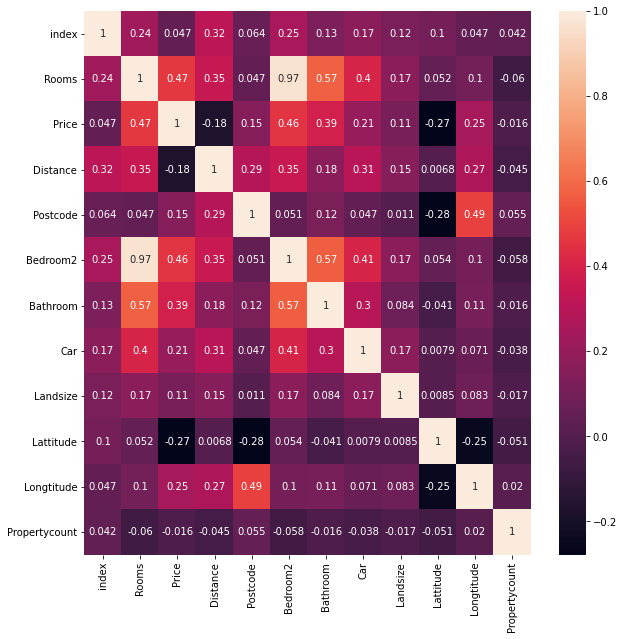

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr=working_df.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr,annot=True,ax=ax)


In [ ]:
corr

,index,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount
index,1.000000,0.235082,0.047358,0.315348,0.064092,0.252080,0.127461,0.170014,0.118820,0.101966,0.047290,0.041602
Rooms,0.235082,1.000000,0.470726,0.347374,0.046922,0.967676,0.572683,0.404087,0.170972,0.052026,0.100200,-0.060387
Price,0.047358,0.470726,1.000000,-0.176188,0.154764,0.460048,0.387801,0.205051,0.111907,-0.273653,0.247509,-0.015915
Distance,0.315348,0.347374,-0.176188,1.000000,0.291557,0.353448,0.175686,0.305510,0.152291,0.006836,0.267088,-0.045436
Postcode,0.064092,0.046922,0.154764,0.291557,1.000000,0.051028,0.124199,0.047211,0.011310,-0.278007,0.492292,0.054860
Bedroom2,0.252080,0.967676,0.460048,0.353448,0.051028,1.000000,0.567914,0.405366,0.170049,0.053712,0.103879,-0.057829
Bathroom,0.127461,0.572683,0.387801,0.175686,0.124199,0.567914,1.000000,0.300603,0.083935,-0.041352,0.111365,-0.015882
Car,0.170014,0.404087,0.205051,0.305510,0.047211,0.405366,0.300603,1.000000,0.170688,0.007941,0.071181,-0.037740
Landsize,0.118820,0.170972,0.111907,0.152291,0.011310,0.170049,0.083935,0.170688,1.000000,0.008525,0.082601,-0.017315
Lattitude,0.101966,0.052026,-0.273653,0.006836,-0.278007,0.053712,-0.041352,0.007941,0.008525,1.000000,-0.249815,-0.050560


As expected correlation between:

*   Bedroom2 and Rooms (More than 0.9)
*   Price and Bedroom2 (around 0.5)
*   Bathroom and rooms (around 0.5)

One of the attributes Bedroom2 or Room can be deleted as this can lead to mulitcollinearity





In [ ]:
working_df=working_df.drop(['Bedroom2'],axis=1).copy()

## Data characteristics based

During intensive exploring of the dataset we found that the address could be too sparse and thus we will remove this from the set of features. Additionally, the suburb contains the generalised information regarding the street. We will also be removing the sellerG which is the name of the seller as this won't be count toward the properties of the house

In [ ]:
working_df.head()

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,1.0,1.0,202.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,1.0,0.0,156.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,2.0,0.0,134.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,2.0,1.0,94.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,1.0,2.0,120.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
#working_df.drop(['Address','SellerG','index'],axis=1,inplace=True)
working_df.drop(['Address','SellerG','index','Suburb','Postcode'],axis=1,inplace=True)

In [ ]:
working_df.shape

(15414, 14)

In [ ]:
working_df.head(3)

,Rooms,Type,Price,Method,Date,Distance,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,2,h,1480000.0,S,3/12/2016,2.5,1.0,1.0,202.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,h,1035000.0,S,4/02/2016,2.5,1.0,0.0,156.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
2,3,h,1465000.0,SP,4/03/2017,2.5,2.0,0.0,134.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


# Feature Engineering

## Extract Month, Day and Year

In [ ]:
#Add this in data cleaning part
working_df['Date']=pd.to_datetime(working_df['Date']).copy()

In [ ]:
working_df.reset_index(drop=True,inplace=True)

In [ ]:
working_df.head(1)

,Rooms,Type,Price,Method,Date,Distance,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,2,h,1480000.0,S,2016-03-12,2.5,1.0,1.0,202.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0


In [ ]:
working_df['day']=working_df['Date'].dt.day

In [ ]:
working_df['month']=working_df['Date'].dt.month

In [ ]:
working_df['year']=working_df['Date'].dt.year

In [ ]:
working_df

,Rooms,Type,Price,Method,Date,Distance,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,day,month,year
0,2,h,1480000.0,S,2016-03-12,2.5,1.0,1.0,202.0,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,12,3,2016
1,2,h,1035000.0,S,2016-04-02,2.5,1.0,0.0,156.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,2,4,2016
2,3,h,1465000.0,SP,2017-04-03,2.5,2.0,0.0,134.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,3,4,2017
3,3,h,850000.0,PI,2017-04-03,2.5,2.0,1.0,94.0,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0,3,4,2017
4,4,h,1600000.0,VB,2016-04-06,2.5,1.0,2.0,120.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0,6,4,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15409,3,h,570000.0,SP,2018-02-24,25.5,2.0,2.0,404.0,Whittlesea City Council,-37.61031,145.03393,Northern Metropolitan,2940.0,24,2,2018
15410,4,h,1480000.0,PI,2018-02-24,6.3,1.0,3.0,593.0,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,24,2,2018
15411,2,h,888000.0,SP,2018-02-24,6.3,2.0,1.0,98.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,24,2,2018
15412,2,t,705000.0,S,2018-02-24,6.3,1.0,2.0,220.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,24,2,2018


Just plotting correlation matrix after new features

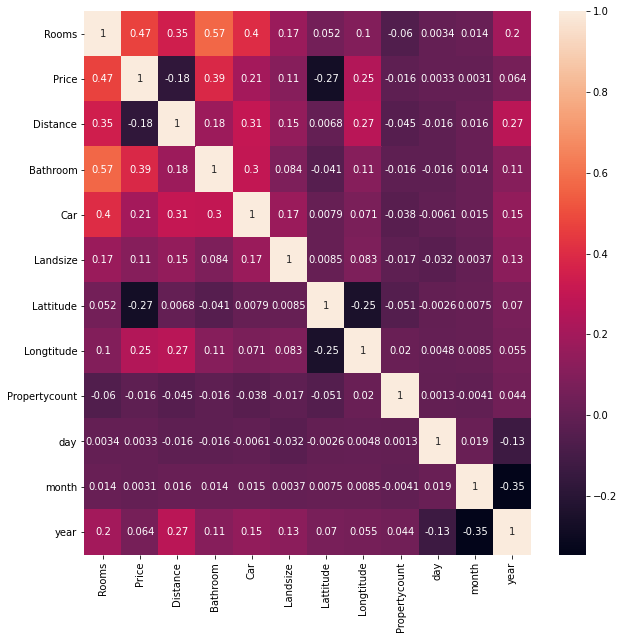

In [ ]:
#import matplotlib.pyplot as plt
#import seaborn as sns

corr=working_df.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr,annot=True,ax=ax)

In [ ]:
corr

,Rooms,Price,Distance,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,day,month,year
Rooms,1.000000,0.470726,0.347374,0.572683,0.404087,0.170972,0.052026,0.100200,-0.060387,0.003398,0.014176,0.196078
Price,0.470726,1.000000,-0.176188,0.387801,0.205051,0.111907,-0.273653,0.247509,-0.015915,0.003262,0.003063,0.063681
Distance,0.347374,-0.176188,1.000000,0.175686,0.305510,0.152291,0.006836,0.267088,-0.045436,-0.016211,0.016329,0.274664
Bathroom,0.572683,0.387801,0.175686,1.000000,0.300603,0.083935,-0.041352,0.111365,-0.015882,-0.015932,0.013755,0.106776
Car,0.404087,0.205051,0.305510,0.300603,1.000000,0.170688,0.007941,0.071181,-0.037740,-0.006088,0.014937,0.146075
Landsize,0.170972,0.111907,0.152291,0.083935,0.170688,1.000000,0.008525,0.082601,-0.017315,-0.031891,0.003702,0.125093
Lattitude,0.052026,-0.273653,0.006836,-0.041352,0.007941,0.008525,1.000000,-0.249815,-0.050560,-0.002627,0.007519,0.069938
Longtitude,0.100200,0.247509,0.267088,0.111365,0.071181,0.082601,-0.249815,1.000000,0.020220,0.004787,0.008472,0.054503
Propertycount,-0.060387,-0.015915,-0.045436,-0.015882,-0.037740,-0.017315,-0.050560,0.020220,1.000000,0.001277,-0.004064,0.044234
day,0.003398,0.003262,-0.016211,-0.015932,-0.006088,-0.031891,-0.002627,0.004787,0.001277,1.000000,0.019256,-0.128995


# Train Test Split

In [ ]:
y=working_df['Price']

In [ ]:
X=working_df

In [ ]:
X.head(3)

,Rooms,Type,Price,Method,Date,Distance,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,day,month,year
0,2,h,1480000.0,S,2016-03-12,2.5,1.0,1.0,202.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,12,3,2016
1,2,h,1035000.0,S,2016-04-02,2.5,1.0,0.0,156.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,2,4,2016
2,3,h,1465000.0,SP,2017-04-03,2.5,2.0,0.0,134.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,3,4,2017


In [ ]:
X.drop(['Price','Date'],axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Feature Preprocessing Pipeline

In [ ]:
X_train.head(2)

,Rooms,Type,Method,Distance,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,day,month,year
73,4,h,S,13.5,1.0,2.0,509.0,Moonee Valley City Council,-37.72610,144.8785,Western Metropolitan,3464.0,27,11,2016
13797,3,h,S,17.2,1.0,4.0,711.0,Maroondah City Council,-37.83315,145.2026,Eastern Metropolitan,4181.0,12,9,2017


In [ ]:
y_test

4962     1650000.0
10811     591000.0
12528     612000.0
8359     1935000.0
1022      575000.0
           ...    
15115    1035000.0
1941      745000.0
6335      860000.0
1091     1445000.0
14210    2610000.0
Name: Price, Length: 3854, dtype: float64

In [ ]:
X_train.columns

Index(['Rooms', 'Type', 'Method', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount',
       'day', 'month', 'year'],
      dtype='object')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


num_attribs = ['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'Lattitude','Longtitude', 'Propertycount', 'day', 'month', 'year']
cat_attribs = ['Type','Method','CouncilArea','Regionname']
#num_attribs = ['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'Lattitude','Longtitude', 'Propertycount', 'day', 'month', 'year']
#cat_attribs = ['Suburb','Type','Method','Postcode','CouncilArea','Regionname']
full_pipeline = ColumnTransformer([
        ('num', num_pipeline, num_attribs),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_attribs)])

X_train_sparse = full_pipeline.fit_transform(X_train)

In [ ]:
X_train_sparse.shape

(11560, 49)

In [ ]:
full_pipeline.get_feature_names

<bound method ColumnTransformer.get_feature_names of ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('num',
                                 Pipeline(memory=None,
                                          steps=[('std_scaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True))],
                                          verbose=False),
                                 ['Rooms', 'Distance', 'Bathroom', 'Car',
                                  'Landsize', 'Lattitude', 'Longtitude',
                                  'Propertycount', 'day', 'month', 'year']),
                                ('cat',
                                 OneHotEncoder(categories='auto', drop=None,
                                  

In [ ]:
#Function to get feature name from preprocessing pipeline
from sklearn.feature_extraction.text import _VectorizerMixin
from sklearn.feature_selection._base import SelectorMixin
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer
def get_feature_out(estimator, feature_in):
    if hasattr(estimator,'get_feature_names'):
        if isinstance(estimator, _VectorizerMixin):
            # handling all vectorizers
            return [f'vec_{f}' \
                for f in estimator.get_feature_names()]
        else:
            return estimator.get_feature_names(feature_in)
    elif isinstance(estimator, SelectorMixin):
        return np.array(feature_in)[estimator.get_support()]
    else:
        return feature_in


def get_ct_feature_names(ct):
    # handles all estimators, pipelines inside ColumnTransfomer
    # doesn't work when remainder =='passthrough'
    # which requires the input column names.
    output_features = []

    for name, estimator, features in ct.transformers_:
        if name!='remainder':
            if isinstance(estimator, Pipeline):
                current_features = features
                for step in estimator:
                    current_features = get_feature_out(step, current_features)
                features_out = current_features
            else:
                features_out = get_feature_out(estimator, features)
            output_features.extend(features_out)
        elif estimator=='passthrough':
            output_features.extend(ct._feature_names_in[features])
                
    return output_features

In [ ]:
#testing the get feature function
get_ct_feature_names(full_pipeline)

['Rooms',
 'Distance',
 'Bathroom',
 'Car',
 'Landsize',
 'Lattitude',
 'Longtitude',
 'Propertycount',
 'day',
 'month',
 'year',
 'Type_h',
 'Type_t',
 'Type_u',
 'Method_PI',
 'Method_S',
 'Method_SA',
 'Method_SP',
 'Method_VB',
 'CouncilArea_Banyule City Council',
 'CouncilArea_Bayside City Council',
 'CouncilArea_Boroondara City Council',
 'CouncilArea_Brimbank City Council',
 'CouncilArea_Darebin City Council',
 'CouncilArea_Glen Eira City Council',
 'CouncilArea_Greater Dandenong City Council',
 'CouncilArea_Hobsons Bay City Council',
 'CouncilArea_Hume City Council',
 'CouncilArea_Kingston City Council',
 'CouncilArea_Knox City Council',
 'CouncilArea_Manningham City Council',
 'CouncilArea_Maribyrnong City Council',
 'CouncilArea_Maroondah City Council',
 'CouncilArea_Melbourne City Council',
 'CouncilArea_Melton City Council',
 'CouncilArea_Monash City Council',
 'CouncilArea_Moonee Valley City Council',
 'CouncilArea_Moreland City Council',
 'CouncilArea_Port Phillip City C

In [ ]:
X_test_sparse = full_pipeline.fit_transform(X_test)

# Model

## (Try) lazy predict

If installing the following module the complete notebook need to be restarted and run to make this work.(As there are some dependency issues in lazypredict)

In [ ]:
!pip install lazypredict

     |████████████████████████████████| 81kB 9.0MB/s 
     |████████████████████████████████| 127.6MB 82kB/s 
     |████████████████████████████████| 25.9MB 112kB/s 
     |████████████████████████████████| 6.8MB 40.3MB/s 
     |████████████████████████████████| 14.5MB 214kB/s 
     |████████████████████████████████| 307kB 57.3MB/s 
     |████████████████████████████████| 10.1MB 54.5MB/s 
     |████████████████████████████████| 276kB 48.6MB/s 
     |████████████████████████████████| 1.2MB 32.6MB/s 
     |████████████████████████████████| 256kB 47.8MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=fb035abd725c03908b6a8da6bde146721a953284d437096101e50b244322b45d
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built PyYAML
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.19.1 which is incompatible.
ERROR: google-colab 1.0.0 has requiremen

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [02:15<00:00,  3.22s/it]


In [ ]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.84,0.84,212037.02,0.33
HistGradientBoostingRegressor,0.83,0.83,214002.41,0.97
XGBRegressor,0.83,0.83,217203.40,1.53
RandomForestRegressor,0.82,0.82,224069.90,7.69
ExtraTreesRegressor,0.81,0.81,229377.98,4.84
BaggingRegressor,0.79,0.79,237996.92,0.85
GradientBoostingRegressor,0.79,0.79,238168.92,2.39
KNeighborsRegressor,0.69,0.69,292583.79,0.56
PoissonRegressor,0.68,0.69,294218.61,0.35


In [ ]:
predictions

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.84,0.84,212037.02,0.33
HistGradientBoostingRegressor,0.83,0.83,214002.41,0.97
XGBRegressor,0.83,0.83,217203.40,1.53
RandomForestRegressor,0.82,0.82,224069.90,7.69
ExtraTreesRegressor,0.81,0.81,229377.98,4.84
BaggingRegressor,0.79,0.79,237996.92,0.85
GradientBoostingRegressor,0.79,0.79,238168.92,2.39
KNeighborsRegressor,0.69,0.69,292583.79,0.56
PoissonRegressor,0.68,0.69,294218.61,0.35


## (Try) Random Forest

In [ ]:

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [600],
    'max_features': [5,6,7,8],
#    'max_features':['auto', 'sqrt'],

    'min_samples_leaf': [2,4,8,10,15],
    'min_samples_split': [10,20,40,50],
    'n_estimators': [25,50,100,200,300]
}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 3)
grid_search.fit(X_train_sparse, y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed: 15.6min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [600],
                         'max_features': [5, 6, 7, 8],
                         'min_samples_leaf': [2, 4, 8, 10, 15],
                         'min_samples_split': [10, 20, 40, 50],
                         'n_estimators': [25, 50, 100, 200, 300]},
             verbose=3)

In [ ]:
model=grid_search.best_estimator_

In [ ]:
grid_search.best_score_

0.7407060069903083

In [ ]:
y_train_predict=model.predict(X_train_sparse)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_train_predict,y_train)

0.6578937706433671

Random

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_sparse, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  7.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
y_train_predict=rf_random.predict(X_train_sparse)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_train_predict,y_train)

0.9150711337651354

In [ ]:
y_test_predict=rf_random.predict(X_test_sparse)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test_predict,y_test)

0.7723731194505961

Trying old random forest

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train_sparse, y_train)

CPU times: user 8.8 s, sys: 35.1 ms, total: 8.84 s
Wall time: 8.8 s


In [ ]:
y_train_predict=rf.predict(X_train_sparse)
from sklearn.metrics import r2_score
r2_score(y_train_predict,y_train)

0.9728892373091398

In [ ]:
y_test_predict=rf.predict(X_test_sparse)
from sklearn.metrics import r2_score
r2_score(y_test_predict,y_test)

0.7738669655397643

In [ ]:
feature_imp_df=[]
for name, score in zip(get_ct_feature_names(full_pipeline), rf.feature_importances_):
  d={'name':name,'score':score}
  feature_imp_df.append(d)

feature_imp_df=pd.DataFrame(feature_imp_df)

In [ ]:
feature_imp_df=feature_imp_df.sort_values(by='score',ascending=False)

Visuaising the feature importance plot

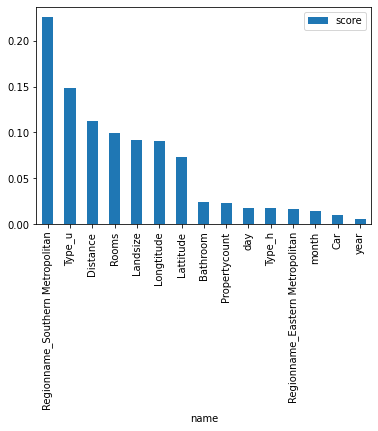

In [ ]:
feature_imp_df.round(3)[:15].set_index('name').plot.bar()

Clearly we can see that pincode or suburb are not contributing much. One change that could be made is to delete the whole suburb and pincode and then recreate the model

In [ ]:
feature_imp_df

,name,score
47,Regionname_Southern Metropolitan,0.225730
13,Type_u,0.148032
1,Distance,0.111985
0,Rooms,0.099092
4,Landsize,0.092400
6,Longtitude,0.090678
5,Lattitude,0.072519
2,Bathroom,0.023889
7,Propertycount,0.022562
8,day,0.018420


## (Try) PCA to lazy

In [ ]:
working_df.head(3)

,Suburb,Rooms,Type,Method,Distance,Postcode,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,day,month,year
0,Abbotsford,2,h,S,2.50,3067.00,1.00,1.00,202.00,Yarra City Council,-37.80,145.00,Northern Metropolitan,4019.00,12,3,2016
1,Abbotsford,2,h,S,2.50,3067.00,1.00,0.00,156.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,2,4,2016
2,Abbotsford,3,h,SP,2.50,3067.00,2.00,0.00,134.00,Yarra City Council,-37.81,144.99,Northern Metropolitan,4019.00,3,4,2017


In [ ]:
X_working_df=working_df[['Rooms','Distance','Bathroom','Car','Landsize']]

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler



X_working_df = StandardScaler().fit_transform(X_working_df)


In [ ]:
X_working_df

array([[-1.09382751, -1.48947412, -0.84877143, -0.70160342, -0.53649264],
       [-1.09382751, -1.48947412, -0.84877143, -1.87187884, -0.62448209],
       [ 0.02675319, -1.48947412,  0.75946001, -1.87187884, -0.66656401],
       ...,
       [-1.09382751, -0.75263217,  0.75946001, -0.70160342, -0.73542532],
       [-1.09382751, -0.75263217, -0.84877143,  0.468672  , -0.50206198],
       [-1.09382751, -0.75263217, -0.84877143, -1.87187884, -0.44467756]])

PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X_working_df)

In [ ]:
pca.explained_variance_ratio_

array([0.42946525, 0.19460637, 0.1643209 , 0.13323369, 0.0783738 ])

Poor variance explained and no much scope for dimensionality reduction

## (Try) Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train_sparse, y_train)

y_train_predict=clf.predict(X_train_sparse)
from sklearn.metrics import r2_score
r2_score(y_train_predict,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.5763314818171718

In [ ]:
y_test_predict=clf.predict(X_test_sparse)
from sklearn.metrics import r2_score
r2_score(y_test_predict,y_test)

0.5395379457522987

## Light GBM

In [ ]:
!pip install lightgbm

Trying a model with default parameter

In [ ]:
%%time
from lightgbm import LGBMRegressor
lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train_sparse, y_train)

CPU times: user 504 ms, sys: 17.6 ms, total: 522 ms
Wall time: 324 ms


In [ ]:
y_train_predict=lgbm_model.predict(X_train_sparse)
from sklearn.metrics import r2_score
r2_score(y_train_predict,y_train)

0.868801945675416

In [ ]:
y_test_predict=lgbm_model.predict(X_test_sparse)
from sklearn.metrics import r2_score
r2_score(y_test_predict,y_test)

0.7926857747345595

In [ ]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_train_predict,y_train)


0.024682526691311487

In [ ]:
mean_squared_log_error(y_test_predict,y_test)

0.03400502425069083

Hyperparameter optimised model identification

In [ ]:
 adj_params = {'n_estimators': range(10, 400, 10),
                 'min_child_weight': range(3, 20, 2),
                 'colsample_bytree': np.arange(0.4, 1.0),
                 'max_depth': range(3, 15, 2),
                 'subsample': np.arange(0.5, 1.0, 0.1),
                 'reg_lambda': np.arange(0.1, 1.0, 0.2),
                 'reg_alpha': np.arange(0.1, 1.0, 0.2),
                 'min_child_samples': range(10, 30)}


In [ ]:
from sklearn.model_selection import  RandomizedSearchCV

lgbm_model=LGBMRegressor()
lgbm_random = RandomizedSearchCV(estimator = lgbm_model, param_distributions = adj_params, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1,scoring='neg_mean_squared_log_error')
# Fit the random search model
lgbm_random.fit(X_train_sparse, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LGBMRegressor(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
                                           objective=None, random_state=None,
                                           reg_alpha=0.0, reg_lambda=0.0,
                                           silen...
                                        'max_depth': range(3, 15, 2),
                                        'min_child_samples': range

In [ ]:
y_train_predict=lgbm_random.predict(X_train_sparse)
from sklearn.metrics import r2_score
r2_score(y_train_predict,y_train)

0.9088768432570579

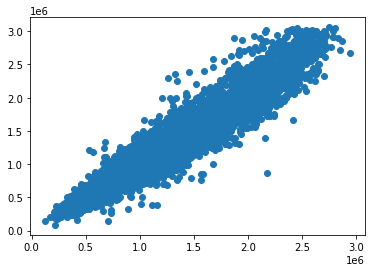

In [ ]:
plt.scatter(y_train_predict,y_train)

In [ ]:
y_test_predict=lgbm_random.predict(X_test_sparse)
from sklearn.metrics import r2_score
r2_score(y_test_predict,y_test)

0.8049475697503877

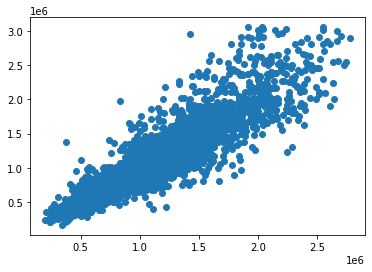

In [ ]:
plt.scatter(y_test_predict,y_test)

Making feature importance dataframe and plotting

In [ ]:
feature_imp_df=[]
for name, score in zip(get_ct_feature_names(full_pipeline), lgbm_random.best_estimator_.feature_importances_):
  d={'name':name,'score':score}
  feature_imp_df.append(d)

feature_imp_df=pd.DataFrame(feature_imp_df)
feature_imp_df=feature_imp_df.sort_values(by='score',ascending=False)

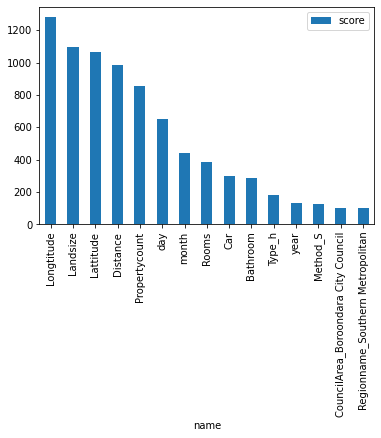

In [ ]:
feature_imp_df.round(3)[:15].set_index('name').plot.bar()

#### Saving the pipeline and machine learning model

In [ ]:
import pickle

In [ ]:
#saving the model
filename = 'lgbm_regressor.sav'
pickle.dump(lgbm_random.best_estimator_, open(filename, 'wb'))

In [ ]:
#saving the preprocessing pipeline
pipeline_fileName = 'pipeline.sav'
pickle.dump(full_pipeline, open(pipeline_fileName, 'wb'))

## (Try) Weighted Average Ensemble technique

In [ ]:
model1=rf_random.best_estimator_
model2=lgbm_random.best_estimator_

In [ ]:
def weighted_average_model_fit(model1,model2,X):
  y_predict_1=model1.predict(X)
  y_predict_2=model2.predict(X)
  y_predict=((0.1*y_predict_1+0.9*y_predict_2))
  return y_predict

In [ ]:
y_pred=weighted_average_model_fit(model1,model2,X_train_sparse)

In [ ]:
y_train_predict=weighted_average_model_fit(model1,model2,X_train_sparse)
from sklearn.metrics import r2_score
r2_score(y_train_predict,y_train)

0.9114026231559271

In [ ]:
y_test_predict=weighted_average_model_fit(model1,model2,X_test_sparse)
from sklearn.metrics import r2_score
r2_score(y_test_predict,y_test)

0.8049557551851781

# Model Web UI

In [ ]:
import pickle
#Loading the saved lgbm model
filename = 'lgbm_regressor.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
#Loading the pipeline for preprocessing
pipeline_fileName = 'pipeline.sav'
loaded_pipeline = pickle.load(open(pipeline_fileName, 'rb'))

In [ ]:
#Using gradile for interface

In [ ]:
get_ct_feature_names(loaded_pipeline)

['Rooms',
 'Distance',
 'Bathroom',
 'Car',
 'Landsize',
 'Lattitude',
 'Longtitude',
 'Propertycount',
 'day',
 'month',
 'year',
 'Type_h',
 'Type_t',
 'Type_u',
 'Method_PI',
 'Method_S',
 'Method_SA',
 'Method_SP',
 'Method_VB',
 'CouncilArea_Banyule City Council',
 'CouncilArea_Bayside City Council',
 'CouncilArea_Boroondara City Council',
 'CouncilArea_Brimbank City Council',
 'CouncilArea_Darebin City Council',
 'CouncilArea_Glen Eira City Council',
 'CouncilArea_Greater Dandenong City Council',
 'CouncilArea_Hobsons Bay City Council',
 'CouncilArea_Hume City Council',
 'CouncilArea_Kingston City Council',
 'CouncilArea_Knox City Council',
 'CouncilArea_Manningham City Council',
 'CouncilArea_Maribyrnong City Council',
 'CouncilArea_Maroondah City Council',
 'CouncilArea_Melbourne City Council',
 'CouncilArea_Melton City Council',
 'CouncilArea_Monash City Council',
 'CouncilArea_Moonee Valley City Council',
 'CouncilArea_Moreland City Council',
 'CouncilArea_Port Phillip City C

In [ ]:
#Installing gradio package (one time)
!pip install gradio

     |████████████████████████████████| 1.6MB 5.5MB/s 
     |████████████████████████████████| 215kB 22.3MB/s 
     |████████████████████████████████| 1.9MB 22.7MB/s 
     |████████████████████████████████| 3.2MB 43.4MB/s 
     |████████████████████████████████| 962kB 40.0MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-cp37-none-any.whl size=4710 sha256=daf599193f805d6ccf4c4604320aab2dc8b203b3dbd8f80cf5be55d25ad44a7a
  Stored in directory: /root/.cache/pip/wheels/cc/ac/c4/bef572cb7e52bfca170046f567e64858632daf77e0f34e5a74
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-cp37-none-any.whl size=3372 sha256=a9cbefc680c7d8857419e345b0ccc9d6deaa5282548b735d7ba4e4e9f10fd90c
  Stored in directory: /root/.cache/pip/wheels/9f/fc/a7/ab5712c3ace9a8f97276465cc2937316ab8063c1fea488ea77
Successfully built ffmpy flask-cachebuster


From the below dataframe: index 4962,12528,8359,14210 are shown as examples in Gradio

In [ ]:
X_test

,Rooms,Type,Method,Distance,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,day,month,year
4962,3,h,S,2.6,2.0,1.0,312.0,Yarra City Council,-37.82170,145.00700,Northern Metropolitan,14949.0,23,4,2016
10811,2,u,S,3.6,1.0,1.0,0.0,Yarra City Council,-37.78791,145.00588,Northern Metropolitan,2954.0,29,7,2017
12528,3,h,S,16.3,1.0,4.0,545.0,Whittlesea City Council,-37.66246,145.03292,Northern Metropolitan,8279.0,21,10,2017
8359,3,h,S,10.5,2.0,1.0,385.0,Bayside City Council,-37.91068,145.00394,Southern Metropolitan,10579.0,6,3,2017
1022,2,u,S,11.2,1.0,1.0,0.0,Bayside City Council,-37.90970,144.99140,Southern Metropolitan,10579.0,11,12,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,3,h,S,6.7,1.0,2.0,375.0,Darebin City Council,-37.75339,144.97687,Northern Metropolitan,11204.0,24,2,2018
1941,2,h,SP,9.2,1.0,3.0,526.0,Darebin City Council,-37.73200,144.98320,Northern Metropolitan,3445.0,12,10,2016
6335,3,u,PI,1.8,2.0,1.0,0.0,Melbourne City Council,-37.80520,144.96040,Northern Metropolitan,6786.0,6,4,2016
1091,2,h,S,10.7,1.0,1.0,649.0,Bayside City Council,-37.91530,145.01420,Southern Metropolitan,6938.0,3,4,2017


In [ ]:
y_test

4962    1650000.00
10811    591000.00
12528    612000.00
8359    1935000.00
1022     575000.00
           ...    
15115   1035000.00
1941     745000.00
6335     860000.00
1091    1445000.00
14210   2610000.00
Name: Price, Length: 3854, dtype: float64

In [ ]:
import gradio as gr, matplotlib.pyplot as plt
#Implementing the function to predict price
#Each of the input is passed as the function argument and these are converted to a dataframe
#This are then processed using the preprocessing pipeline
#The output of preprocessing pipeline is fed into the loaded machine learning model
#The predicted value is then returned and is shown in Gradio interface
def price_forecast(rooms,Type,Method,distance,Bathroom,Car,Landsize,Council_area,Latitude,Longitude,region_Name,Property_Count,day,month,year):
  s = pd.Series([rooms,Type,Method,distance,Bathroom,Car,Landsize,Council_area,Latitude,Longitude,region_Name,Property_Count,day,month,year],index=['Rooms', 'Type', 'Method', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount',
       'day', 'month', 'year'])
  input_df=pd.DataFrame(columns=['Rooms', 'Type', 'Method', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount',
       'day', 'month', 'year'])
  input_df=input_df.append(s,ignore_index=True)

  transformed_input_df=loaded_pipeline.transform(input_df)
  predict=loaded_model.predict(transformed_input_df)
  print(predict)
    # ... run model to forecast outbreak and generate plots
    # ... return plt
  return round(predict[0])






Type = gr.inputs.Radio(["h", "t", "u"])
Method = gr.inputs.Radio(["PI", "S", "SA","SP","VB"])
Council_area = gr.inputs.Dropdown(['Banyule City Council',
 'Bayside City Council',
 'Boroondara City Council',
 'Brimbank City Council',
 'Darebin City Council',
 'Glen Eira City Council',
 'Greater Dandenong City Council',
 'Hobsons Bay City Council',
 'Hume City Council',
 'Kingston City Council',
 'Knox City Council',
 'Manningham City Council',
 'Maribyrnong City Council',
 'Maroondah City Council',
 'Melbourne City Council',
 'Melton City Council',
 'Monash City Council',
 'Moonee Valley City Council',
 'Moreland City Council',
 'Port Phillip City Council',
 'Stonnington City Council',
 'Whitehorse City Council',
 'Whittlesea City Council',
 'Wyndham City Council',
 'Yarra City Council'])
region_Name=gr.inputs.Radio([ 'Eastern Metropolitan',
 'Northern Metropolitan',
 'South-Eastern Metropolitan',
 'Southern Metropolitan',
 'Western Metropolitan'])

rooms = gr.inputs.Slider(1, 5,step=1)
distance=gr.inputs.Slider(0, 30)
Bathroom=gr.inputs.Slider(0, 3,step=1)
Car=gr.inputs.Slider(0, 4,step=1)
Landsize=gr.inputs.Slider(1, 10100,step=1)
Latitude=gr.inputs.Slider(-38.007, -37.566)
Longitude=gr.inputs.Slider(144.598, 145.302)
Property_Count=gr.inputs.Slider(588, 17496,step=1)
day=gr.inputs.Slider(1, 31,step=1)
month=gr.inputs.Slider(1, 12,step=1)
year=gr.inputs.Slider(2010, 2030,step=1)


gr.Interface(fn=price_forecast,
    inputs=[rooms,Type,Method,distance,Bathroom,Car,Landsize,Council_area,Latitude,Longitude,region_Name,Property_Count,day,month,year], outputs="number",title="Property Price Calculator",description="This is a machine learning based price prediction engine for Melbourne property. Please fill the below features and click on submit to see price estimate. Created by : Nithin Jose: u1123478",
    examples=[
        
        [3, 'h', 'S', 2.6, 2.0, 1.0, 312.0, 'Yarra City Council',
        -37.8217, 145.007, 'Northern Metropolitan', 14949.0, 23, 4, 2016],

        [3, 'h', 'S', 16.3, 1.0, 4.0, 545.0, 'Whittlesea City Council',
        -37.66, 145.03292, 'Northern Metropolitan', 8279.0,
        21, 10, 2017],
        [3, 'h', 'S', 10.5, 2.0, 1.0, 385.0, 'Bayside City Council',
        -37.91068, 145.00394, 'Southern Metropolitan', 10579.0, 6, 3,
        2017],
        [3, 'h', 'SP', 4.6, 2.0, 0.0, 279.0, 'Stonnington City Council',
        -37.85122, 145.00513999999998, 'Southern Metropolitan', 7717.0,
        3, 3, 2018],
    ]).launch(debug=True,share=False)



Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
This share link will expire in 24 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted (NEW!)
Running on External URL: https://58730.gradio.app
Interface loading below...
